# BATCH_DS2310_PHASE2_EVALUATION_PROJECT

In [225]:
import numpy as np
import pandas as pd
import io
import requests
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [226]:
df=pd.read_csv("PowerPlant_IND.csv")

In [227]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [228]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

I am going to drop columns with highest number of null values,filling that number of data by techniques or manually lead to affect the accuracy. (mostly 0 and 1 non-nulls and much less than half of the highest entry.)   

In [230]:
df.drop(['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel1','other_fuel2'],axis=1,inplace=True)

In [231]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

we dont need the powerpoint identifier ,
                 owners names,
                 generation data ,name,url    
                 for prediction ,so I drop them.
                 

In [232]:
df.drop(['gppd_idnr','owner','generation_data_source','name','url'],axis=1,inplace=True)

In [233]:
df.isnull().sum()

country                    0
country_long               0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2013      524
generation_gwh_2014      507
generation_gwh_2015      483
generation_gwh_2016      471
generation_gwh_2017      465
dtype: int64

I will drom those who only have 1 nonunique data

In [234]:
df['year_of_capacity_data'].nunique()

1

In [235]:
df['country'].nunique()

1

In [236]:
df['country_long'].nunique()

1

In [237]:
df.drop(['country','country_long','year_of_capacity_data'],axis=1,inplace=True)

filling with mode because of categorical data 

In [238]:
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [239]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source       0
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

In [240]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


In [241]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source       0
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

In [242]:
df['latitude'].fillna(df['latitude'].mode()[0], inplace=True)

In [243]:
df['longitude'].fillna(df['longitude'].mode()[0], inplace=True)

In [244]:
df['commissioning_year'].fillna(df['commissioning_year'].mode()[0], inplace=True)

In [245]:
df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mode()[0], inplace=True)

In [246]:
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mode()[0], inplace=True)

In [247]:
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mode()[0], inplace=True)

In [248]:
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mode()[0], inplace=True)

In [249]:
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mode()[0], inplace=True)

In [250]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

In [251]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,908.0,321.046378,580.221767,0.0000,16.837500,60.00000,388.125000,4760.000
latitude,908.0,21.084948,6.107146,8.1689,17.057825,21.27885,25.183775,34.649
longitude,908.0,77.156237,4.945215,68.6447,73.812975,76.49290,79.211600,95.408
commissioning_year,908.0,2003.624449,15.238021,1927.0000,1997.000000,2013.00000,2013.000000,2018.000
generation_gwh_2013,908.0,974.403892,2716.222621,0.0000,0.000000,0.00000,470.116200,27586.200
generation_gwh_2014,908.0,1068.918194,2924.098882,0.0000,0.000000,0.00000,570.095213,28127.000
generation_gwh_2015,908.0,1129.934756,3103.712012,0.0000,0.000000,0.00000,605.769975,30539.000
generation_gwh_2016,908.0,1181.024405,3129.230619,0.0000,0.000000,0.00000,669.808766,30015.000
generation_gwh_2017,908.0,1235.206195,3185.504866,0.0000,0.000000,0.00000,708.134037,35116.000


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    object 
 4   commissioning_year   908 non-null    float64
 5   source               908 non-null    object 
 6   geolocation_source   908 non-null    object 
 7   generation_gwh_2013  908 non-null    float64
 8   generation_gwh_2014  908 non-null    float64
 9   generation_gwh_2015  908 non-null    float64
 10  generation_gwh_2016  908 non-null    float64
 11  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.3+ KB


<Axes: xlabel='primary_fuel', ylabel='count'>

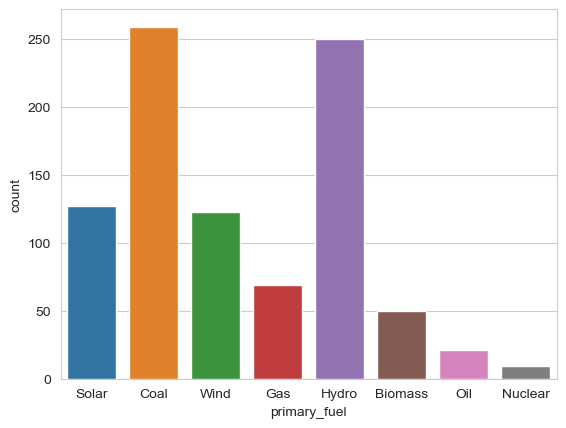

In [253]:
sns.countplot(x="primary_fuel", data=df)

In [254]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [255]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [256]:
df['source'].nunique()

191

In [257]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['primary_fuel'] = encoder.fit_transform(df['primary_fuel'])
df['geolocation_source'] = encoder.fit_transform(df['geolocation_source'])
df['source'] = encoder.fit_transform(df['source'])

In [258]:
df['geolocation_source'].unique()

array([1, 2, 0])

In [259]:
df['primary_fuel'].unique()

array([6, 1, 7, 2, 3, 0, 5, 4])

In [260]:
df['source'].unique()

array([109, 174,  21,  22,  58,  36,  10, 148, 112,  97,  84,  67,  14,
        75,  65,  64, 172, 184,  62,  72, 106, 163, 179, 142,  17,  18,
        68,   6,   2, 144, 125,  61, 102,  85,  83,  26,   4,  88, 122,
         3,  19,  59,  54,  95,  29,  89, 157, 119, 134,  20,  31,  32,
       103, 151,  76, 146,  70, 110, 188, 173,  39,   9, 158,  23,  86,
        47, 117, 162, 121,  98, 129, 155,   8,  73, 126, 135,  38,  56,
        77,  46,  74, 164, 187,  24,  79, 190,  96,  43, 178, 160,  57,
       152,  82,  15, 115,  55,  33,  42,  12, 132, 145,  53,  40, 156,
         1, 175, 176,  69, 138,  63, 167,  87, 123,  25, 120,  90,  16,
        91,  92,  93,  94,   7, 136,  50, 116, 170, 168,  49, 133,  44,
       127, 171, 118, 131, 107, 113,  37,  60, 124,  41, 153,  52,  28,
       143, 177, 165,  48, 159, 111, 147,  11, 186, 169,  66, 161, 139,
       185, 140,  45,  81, 154, 181, 149, 141,  30, 150,  34, 105,   5,
       128,  99,  71,  13, 137,  80, 100,  27,  35, 104, 130, 11

In [261]:
dfcorr=df.corr()

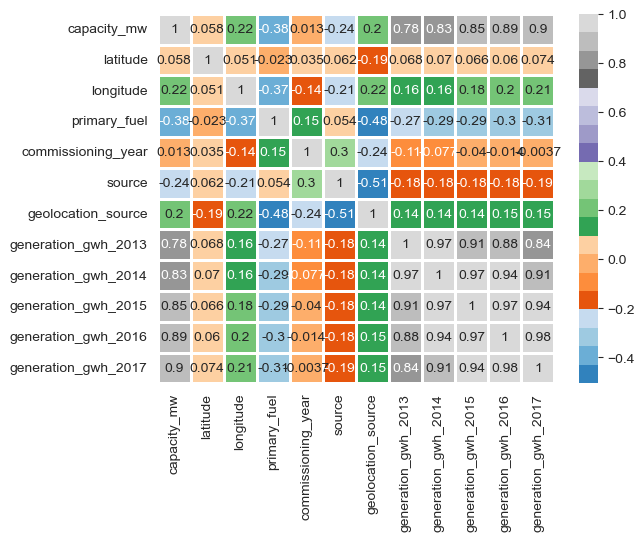

In [262]:
import seaborn as sns


sns.set_style("whitegrid")


sns.heatmap(dfcorr, annot=True, linewidth=1, cmap='tab20c')


plt.show()


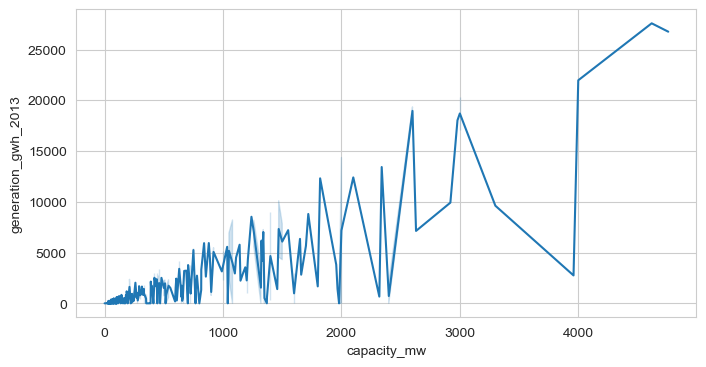

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
sns.lineplot(x='capacity_mw', y='generation_gwh_2013', data=df)
plt.show()

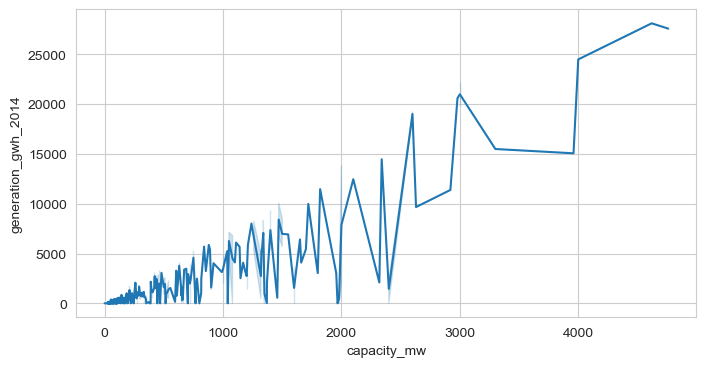

In [264]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='capacity_mw', y='generation_gwh_2014', data=df)
plt.show()

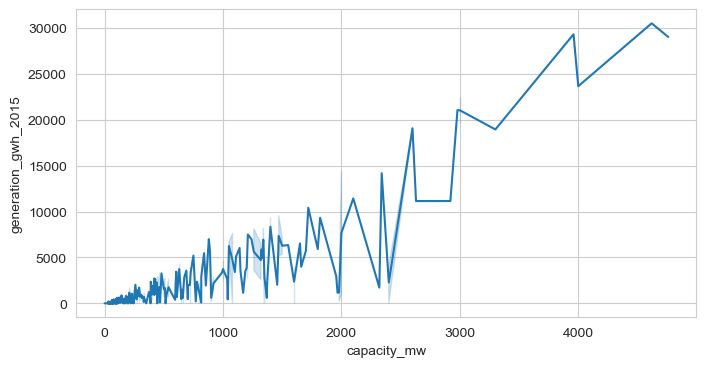

In [265]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='capacity_mw', y='generation_gwh_2015', data=df)
plt.show()

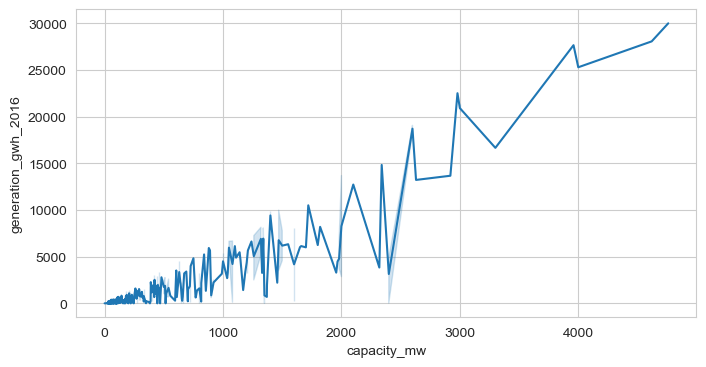

In [266]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='capacity_mw', y='generation_gwh_2016', data=df)
plt.show()

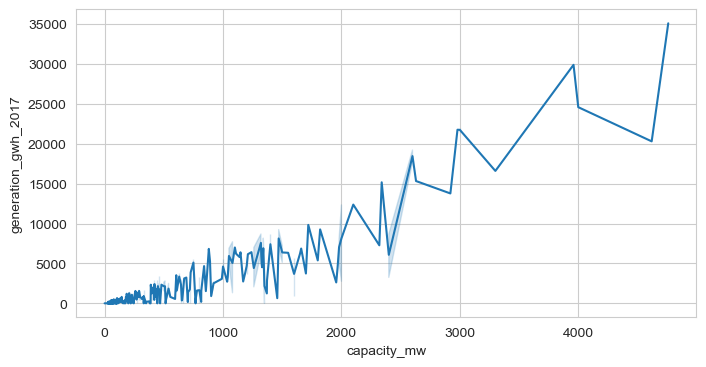

In [267]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='capacity_mw', y='generation_gwh_2017', data=df)
plt.show()

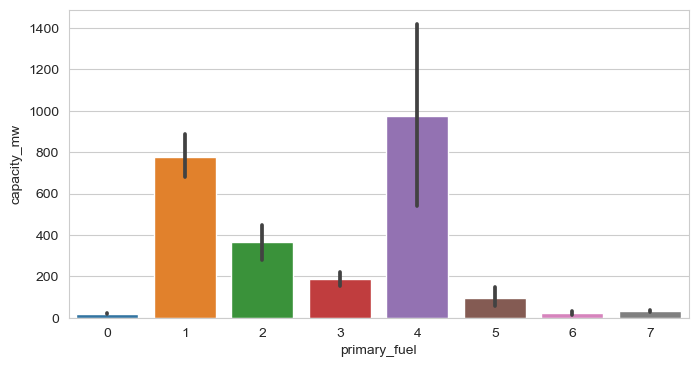

In [268]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))


sns.barplot(x='primary_fuel', y='capacity_mw', data=df)


plt.show()


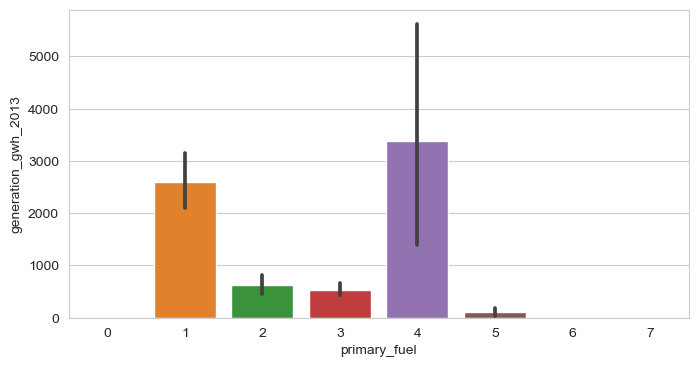

In [269]:
plt.figure(figsize=(8,4))
sns.barplot(x='primary_fuel',y='generation_gwh_2013',data=df)
plt.show()

<Figure size 800x400 with 0 Axes>

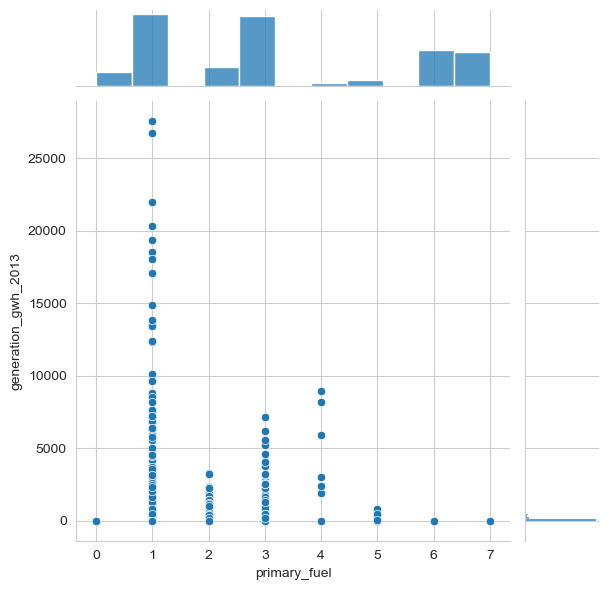

In [270]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))


sns.jointplot(x='primary_fuel', y='generation_gwh_2013', data=df)


plt.show()


<Figure size 800x400 with 0 Axes>

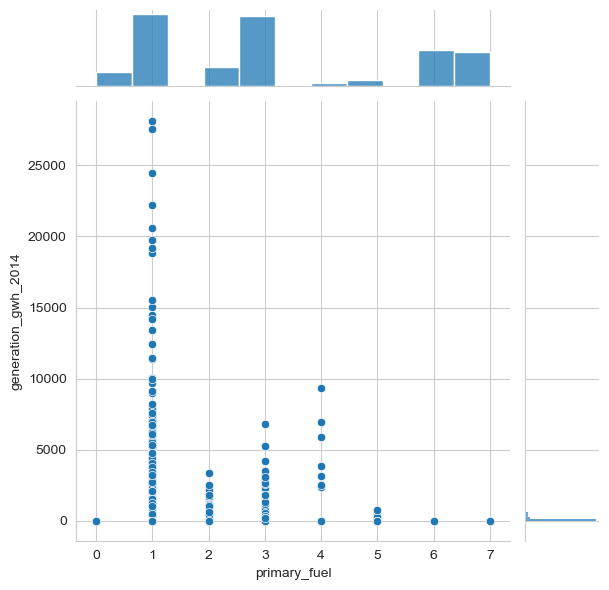

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))


sns.jointplot(x='primary_fuel', y='generation_gwh_2014', data=df)


plt.show()


<Figure size 800x400 with 0 Axes>

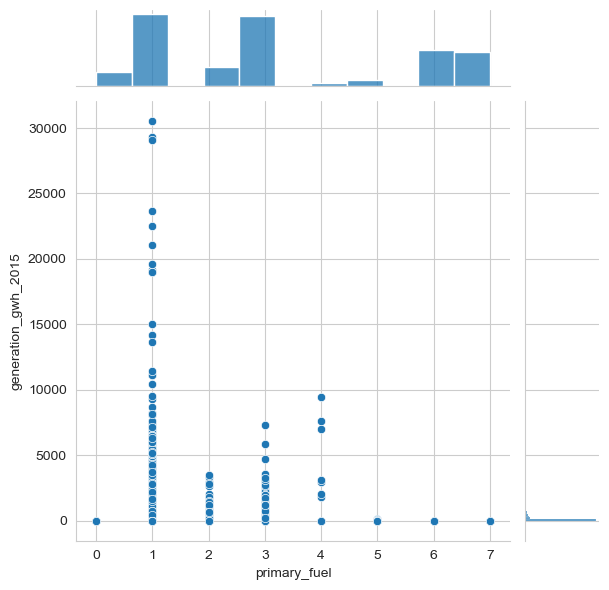

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))


sns.jointplot(x='primary_fuel', y='generation_gwh_2015', data=df)


plt.show()


<Figure size 800x400 with 0 Axes>

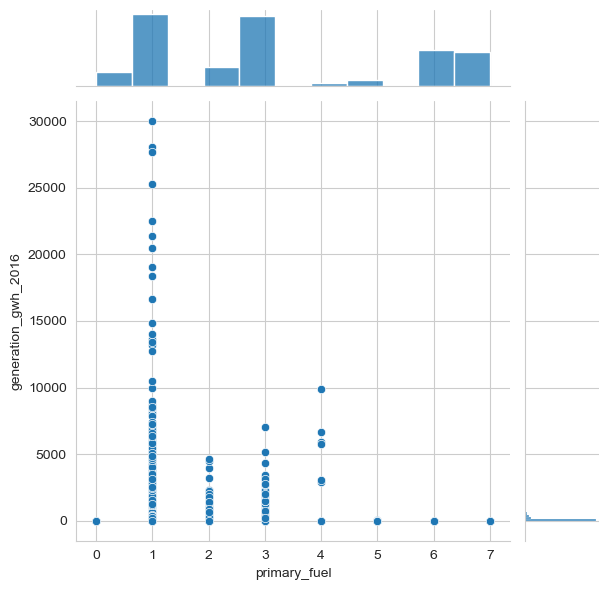

In [273]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))


sns.jointplot(x='primary_fuel', y='generation_gwh_2016', data=df)


plt.show()


<Figure size 800x400 with 0 Axes>

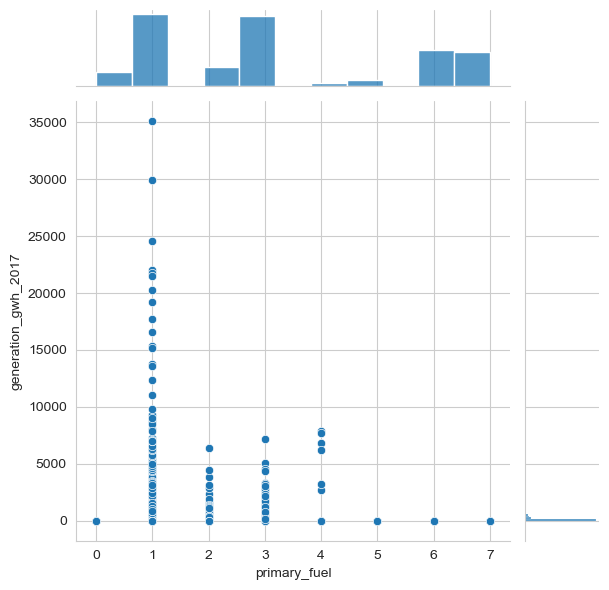

In [274]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))


sns.jointplot(x='primary_fuel', y='generation_gwh_2017', data=df)


plt.show()


<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2017'>

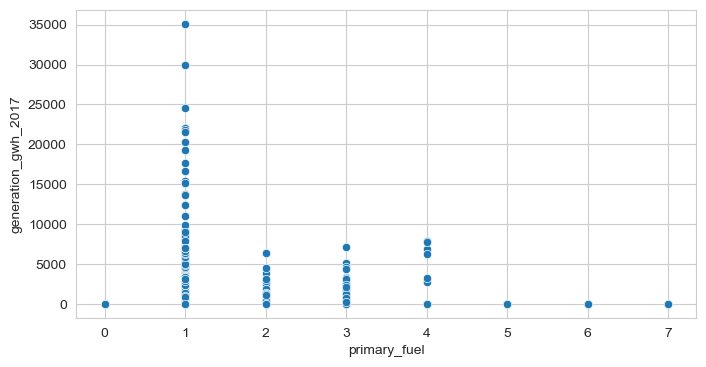

In [275]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2017',data=df)

<Axes: xlabel='primary_fuel', ylabel='latitude'>

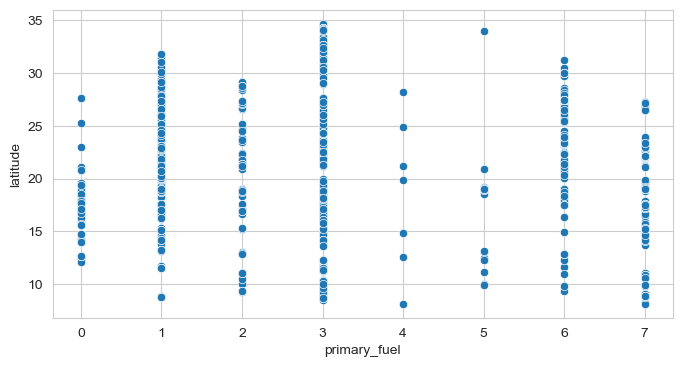

In [276]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='latitude',data=df)

<Axes: xlabel='capacity_mw', ylabel='primary_fuel'>

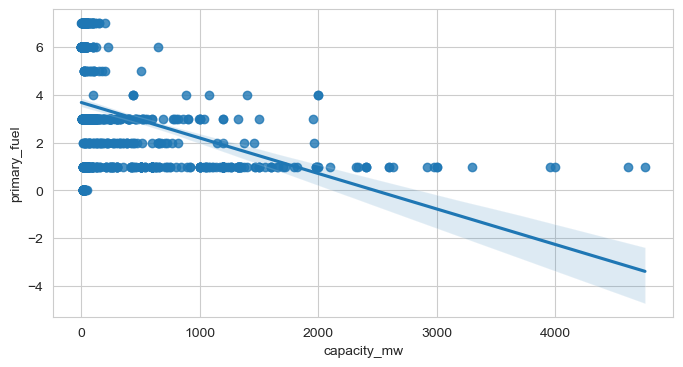

In [277]:
plt.figure(figsize=(8,4))
sns.regplot(x='capacity_mw',y='primary_fuel',data=df)

In [278]:
from scipy.stats import zscore
z=np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
print(np.where(z>3))

(array([ 15,  15,  15,  15, 144, 144, 144, 144, 144, 144, 159, 159, 210,
       210, 210, 210, 210, 210, 309, 309, 309, 309, 309, 309, 364, 365,
       365, 365, 365, 365, 365, 376, 483, 494, 494, 494, 494, 494, 494,
       495, 495, 495, 495, 495, 495, 533, 533, 624, 649, 649, 649, 649,
       649, 649, 658, 658, 658, 658, 658, 658, 696, 696, 696, 696, 696,
       722, 722, 722, 722, 722, 725, 725, 725, 725, 725, 727, 727, 727,
       727, 727, 727, 787, 787, 787, 787, 787, 787, 789, 809, 809, 809,
       809, 809, 809, 881, 881, 881, 881, 881, 881], dtype=int64), array([2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3,
       4, 5, 5, 0, 1, 2, 3, 4, 5, 5, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4,
       5, 0, 1, 1, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 5,
       0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5], dtype=int64))


In [279]:
z = np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

In [280]:
df=df1.copy()

In [281]:
df.shape

(885, 12)

In [283]:
import plotly.figure_factory as ff
import pandas as pd

num_cols = 4

traces = []


for col in df.columns:
    
    traces.append(ff.create_distplot([df[col]], group_labels=[col], colors=['blue']))


fig = make_subplots(rows=num_rows, cols=num_cols)


for i, trace in enumerate(traces):
    row_index = i // num_cols + 1
    col_index = i % num_cols + 1
    for t in trace['data']:
        fig.add_trace(t, row=row_index, col=col_index)


fig.update_layout(height=1000, width=800, title_text="Distribution of Features")
fig.show()


In [284]:
df.skew()

capacity_mw            2.052718
latitude              -0.084941
longitude              1.179875
primary_fuel           0.430662
commissioning_year    -1.780225
source                 1.788010
geolocation_source    -2.118329
generation_gwh_2013    2.962116
generation_gwh_2014    2.839020
generation_gwh_2015    2.659857
generation_gwh_2016    2.606987
generation_gwh_2017    2.518514
dtype: float64

In [285]:
from sklearn.preprocessing import power_transform
df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]=power_transform(df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])
df.skew()

capacity_mw            0.014952
latitude              -0.084941
longitude              1.179875
primary_fuel           0.430662
commissioning_year    -1.780225
source                 1.788010
geolocation_source    -2.118329
generation_gwh_2013    0.536571
generation_gwh_2014    0.498248
generation_gwh_2015    0.419903
generation_gwh_2016    0.379633
generation_gwh_2017    0.369146
dtype: float64

In [286]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [287]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [288]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

best_random_state = None
best_test_accuracy = float('-inf')

for i in range(0, 100):
   
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    
   
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    
   
    LR_predict_test = LR.predict(x_test)
    
   
    test_accuracy = r2_score(y_test, LR_predict_test)
    
    
    print(f"At random state {i}, The test accuracy is: {test_accuracy}")
    
    
    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        best_random_state = i

print(f"\nThe best random state is {best_random_state} with a test accuracy of {best_test_accuracy}")


At random state 0, The test accuracy is: 0.6949837467039037
At random state 1, The test accuracy is: 0.6798649175438374
At random state 2, The test accuracy is: 0.6062966875309124
At random state 3, The test accuracy is: 0.7176253808635246
At random state 4, The test accuracy is: 0.6779059069216631
At random state 5, The test accuracy is: 0.6801341891152002
At random state 6, The test accuracy is: 0.6589728522457037
At random state 7, The test accuracy is: 0.6497108665312537
At random state 8, The test accuracy is: 0.6929157535492612
At random state 9, The test accuracy is: 0.7547375290811675
At random state 10, The test accuracy is: 0.6838464121401703
At random state 11, The test accuracy is: 0.7333923519244938
At random state 12, The test accuracy is: 0.6810664073822914
At random state 13, The test accuracy is: 0.6634899566132526
At random state 14, The test accuracy is: 0.7109075929125279
At random state 15, The test accuracy is: 0.6728644153580923
At random state 16, The test accur

In [289]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=67)

In [290]:
x_train.shape

(646, 11)

In [291]:
from scipy.stats import zscore
from sklearn.svm import SVR
import pickle
import os
import joblib
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from pandas.api.types import CategoricalDtype
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [292]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.6706135035193231


In [293]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 0.24727253751284958
MAE: 0.38920584706816574
r2_score: 0.6505752528155535


In [294]:
R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.6704355865324059


In [295]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))

MSE: 0.2493316295826693
MAE: 0.3912775253260924
r2_score: 0.6426380507685135


In [296]:
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.6595220828625614


In [297]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 0.24440791877884357
MAE: 0.38041646531308604
r2_score: 0.7134017080812936


In [298]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9607032636495068


In [299]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 0.16550508722845825
MAE: 0.29328843334585053
r2_score: 0.799264101318921


In [300]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.9907632195891454


In [301]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 0.32728895934088664
MAE: 0.3970071815087117
r2_score: 0.6784972071516946


In [302]:
np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 0.305566, 0.055619
R    : 0.305086, 0.055349
svr    : 0.313027, 0.054937
svr_p    : 0.220500, 0.069639
svr_r    : 0.366772, 0.090176
RF    : 0.213226, 0.072103


# hyper parameter tuning

In [303]:
GF=GradientBoostingRegressor()
param={
     'criterion':['mse','mae'],
     'n_estimators':[100, 200],
    }

In [304]:
GF_grid=GridSearchCV(RandomForestRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

Here Gradient Boosting regressor is best model

In [310]:
x=df.drop(['primary_fuel'],axis=1)
y=df['primary_fuel']

In [311]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)

In [312]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [313]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x,y,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.7932203389830509


In [314]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

Training accuracy:: 1.0
Test accuracy:: 0.7866108786610879


In [315]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.6983050847457626


In [316]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

Training accuracy:: 0.7956656346749226
Test accuracy:: 0.7154811715481172


In [317]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x,y,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8463276836158192


In [318]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

Training accuracy:: 1.0
Test accuracy:: 0.8410041841004184


Some ensembles

In [319]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x,y,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

C:\Users\Debanjan\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning:

The least populated class in y has only 9 members, which is less than n_splits=10.



cross validation score for Ada boost: 0.5604570990806945


In [320]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

Training accuracy:: 0.48761609907120745
Test accuracy:: 0.497907949790795


In [321]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x,y,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

C:\Users\Debanjan\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning:

The least populated class in y has only 9 members, which is less than n_splits=10.



cross validation score for BAGGING Classifier: 0.8361976506639428


In [322]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

Training accuracy:: 0.9907120743034056
Test accuracy:: 0.8619246861924686


In [323]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x,y,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

C:\Users\Debanjan\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning:

The least populated class in y has only 9 members, which is less than n_splits=10.



cross validation score for Gradient Boosting Classifier: 0.8474463738508682


In [324]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

Training accuracy:: 1.0
Test accuracy:: 0.8493723849372385


## Best Model saving

In [325]:
best_model = GradientBoostingClassifier()


In [326]:
import joblib

In [328]:
from joblib import dump
dump(best_model, 'best_model_Global_Power_Point_Data .joblib')
print("Best model saved successfully.")

Best model saved successfully.


## Findings

* Here we can notice generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 are positively correlated to capacity_mw
* We can notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2013
* In 2014 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2014
* In 2015 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2015
* same for 2016 and 2017 
* We can here the coal is most used fuel in 2013 and Nuclear,Gas and hydro on average use and Solar,Wind Bomass nad oil was very less used
* Coal is on Max Electrical generating capacity in Megawatts
* **Gradient Boosting Classifier** is ideal for predicting primary fuel type and capacity_mw due to its ability to handle complex relationships, feature importance analysis, and **ensemble learning, resulting in high accuracy and robustness**.